# Animation
write something maybe?

## Functions

In [2]:
import matplotlib.pyplot as plt
from matplotlib import animation
from colour import Color
import numpy as np


def init():
    line.set_data([], [])
    # line2.set_data([], [])
    return line


def nextLineAnim(i, t, x, y1):
    plt.title("t = {}".format(round(t[i], 2)))
    line.set_data(x, y1[i, :])
    # lineExact.set_data(x, u(t[i], x))
    # line2.set_data(hlist, y2[:, i])
    # line3.set_data(hlist, y3[:, i])
    return line


In [4]:

n = 30 # points along x
ts = 0.1 # timestep increments
tEnd = 20
frames = tEnd / ts

time = np.arange(0, tEnd, ts)


x = np.arange(n)
y = np.array([[(i+0.1*t)/30*5 for i in range(len(x))] for t in time])
# x
# y


#%% animation
fig = plt.figure()
ax = plt.axes(xlim=(min(x), max(x)), ylim=(np.min(y), np.max(y)))
line, = ax.plot([], [], lw=2, label="CN")

anim = animation.FuncAnimation(fig, nextLineAnim, init_func=init,
                                   frames=frames, interval=int(2000/frames),
                                   fargs=(time, x, y))

plt.show()


## 3D 

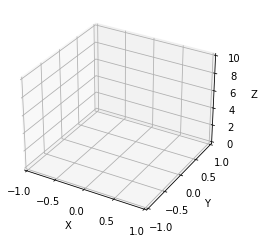

In [5]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


def gen(n):
    phi = 0
    while phi < 2*np.pi:
        yield np.array([np.cos(phi), np.sin(phi), phi])
        phi += 2*np.pi/n


def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])


if True:
    N = 100
    data = np.array(list(gen(N))).T
    line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

    # Setting the axes properties
    ax.set_xlim3d([-1.0, 1.0])
    ax.set_xlabel('X')

    ax.set_ylim3d([-1.0, 1.0])
    ax.set_ylabel('Y')

    ax.set_zlim3d([0.0, 10.0])
    ax.set_zlabel('Z')

    ani = animation.FuncAnimation(fig, update, N, fargs=(data, line),
                                  interval=10000/N, blit=False)
    plt.show()
#ani.save('matplot003.gif', writer='imagemagick')